In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from dataset import TileDataset
from models import TileMLP

2023-11-04 16:17:25.747630: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-04 16:17:25.749448: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-04 16:17:25.772924: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-04 16:17:25.772948: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-04 16:17:25.772966: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
batch_size = 512
batch_per_file_size = 16
dataset = TileDataset(
    batch_size=batch_size,
    batch_per_file_size=batch_per_file_size,
    build_tfrecords=False)

In [3]:
mlp = TileMLP(
    batch_size, 
    learning_rate=2e-4, 
    batch_per_file_size=batch_per_file_size)

In [4]:
mlp.train(dataset, None)

iteration 500 training loss 6.3099165 lr 0.00002
iteration 1000 training loss 3.6677814 lr 0.00004
iteration 1500 training loss 3.3082256 lr 0.00006
iteration 2000 training loss 3.1914163 lr 0.00008
iteration 2500 training loss 2.8393834 lr 0.00010
iteration 3000 training loss 2.9546647 lr 0.00012
iteration 3500 training loss 2.6318595 lr 0.00014
iteration 4000 training loss 2.5149813 lr 0.00016
iteration 4500 training loss 2.9366121 lr 0.00018
iteration 5000 training loss 2.4513254 lr 0.00020
iteration 5500 training loss 2.7355285 lr 0.00020
iteration 6000 training loss 2.2259355 lr 0.00020
iteration 6500 training loss 1.8941888 lr 0.00020
iteration 7000 training loss 2.3925452 lr 0.00020
iteration 7500 training loss 2.5830803 lr 0.00020
iteration 8000 training loss 2.5523503 lr 0.00020
iteration 8500 training loss 2.5563273 lr 0.00020
iteration 9000 training loss 2.194652 lr 0.00020
iteration 9500 training loss 2.3934896 lr 0.00020
iteration 10000 training loss 2.2310107 lr 0.00020
e

## Evaluate validation set

In [5]:
val_df = mlp.predict_over_dataset(dataset.valid_data, return_labels=True)

In [6]:
val_df[['prediction', 'target']].describe()

,prediction,target
count,1.042735e+06,1.042735e+06
mean,-2.099493e+00,1.267942e+00
std,3.410350e+00,7.997063e-01
min,-1.152186e+01,-4.157284e-01
25%,-4.700581e+00,6.690614e-01
50%,-2.729320e+00,1.165585e+00
75%,1.667809e-02,1.747577e+00
max,1.473461e+01,7.079467e+00


In [7]:
val_df

,ID,config_index,prediction,target
0,b'tile:xla:inception_v3_batch_128_train_76efb3...,4,2.289339,0.237213
1,b'tile:xla:bert_pretraining.4x4.fp16_-4dd341a0...,119,0.328927,1.872907
2,b'tile:xla:bert_pretraining.4x4.fp16_2e734f166...,189,-0.525350,1.800552
3,b'tile:xla:inception_v3_batch_128_train_-becff...,116,1.561948,0.057371
4,b'tile:xla:inception_v3_batch_128_train_3b65e4...,30,6.539321,1.717444
...,...,...,...,...
1042730,b'tile:xla:resnet_v1_50_official_batch_128_bf1...,1634,-4.981566,0.655796
1042731,b'tile:xla:resnet_v1_50_official_batch_128_bf1...,7576,5.291047,3.400179
1042732,b'tile:xla:resnet_v1_50_official_batch_128_bf1...,5481,-3.029160,1.514613
1042733,b'tile:xla:resnet_v1_50_official_batch_128_bf1...,5729,-5.540171,0.718147


In [8]:
val_df.groupby('ID').count().describe()

,config_index,prediction,target
count,676.000000,676.000000,676.000000
mean,1542.507396,1542.507396,1542.507396
std,2271.963138,2271.963138,2271.963138
min,4.000000,4.000000,4.000000
25%,130.000000,130.000000,130.000000
50%,603.500000,603.500000,603.500000
75%,1893.000000,1893.000000,1893.000000
max,9997.000000,9997.000000,9997.000000


Text(0, 0.5, 'prediction')

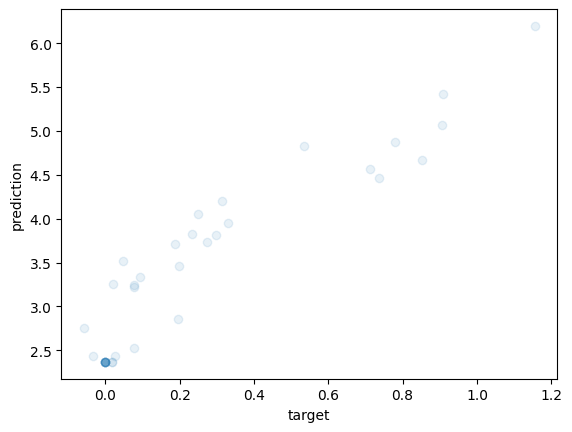

In [17]:
x_lin = np.linspace(0, 3, 100)
#plt.plot(x_lin, x_lin, color='orange')

#random_sample = val_df.sample(1000)
random_id = np.random.choice(val_df['ID'].unique())
random_sample = val_df[val_df['ID'] == random_id]

plt.scatter(
    random_sample.target,
    random_sample.prediction,
    alpha=0.1
)
plt.xlabel('target')
plt.ylabel('prediction')

Text(0, 0.5, 'squared error')

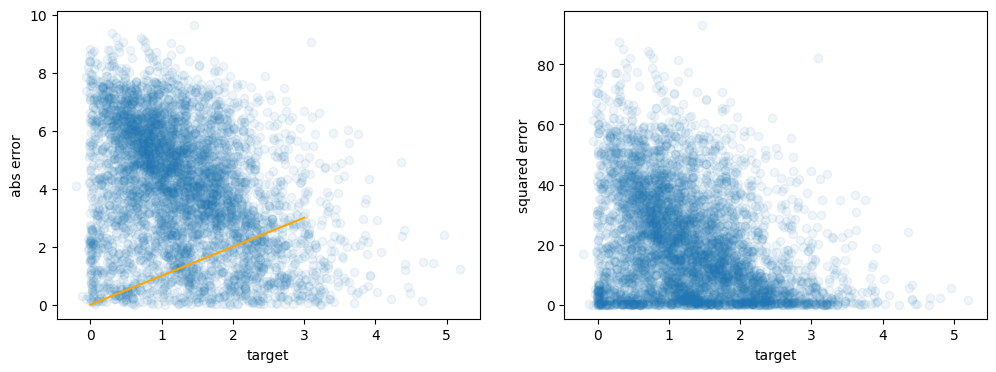

In [10]:
random_sample = val_df.sample(5_000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample['target'],
    np.abs(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('abs error')
x_lin = np.linspace(0, 3, 100)
plt.plot(x_lin, x_lin, color='orange')


plt.subplot(1, 2, 2)
plt.scatter(
    random_sample['target'],
    np.square(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('squared error')

In [18]:
def compute_best_5(df):
    top = df.sort_values('prediction').iloc[:5]
    top = top['config_index'].values.tolist()
    top = [str(i) for i in top]
    return ';'.join(top)

In [19]:
val_prediction = val_df.groupby('ID').apply(compute_best_5)
val_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
val_prediction

ID
tile:xla:bert_pretraining.4x4.fp16_-18321ad156c55c0b          423;82;846;252;338
tile:xla:bert_pretraining.4x4.fp16_-1972c148bcabec74            367;229;33;81;82
tile:xla:bert_pretraining.4x4.fp16_-1a91e1daf560d9c7              66;15;82;13;32
tile:xla:bert_pretraining.4x4.fp16_-1c6db741e059e66c                 5;3;7;11;15
tile:xla:bert_pretraining.4x4.fp16_-2687e894772f7802         1142;0;654;491;1143
                                                                  ...           
tile:xla:unet_3d.4x4.bf16_-563d7c5458dedfa9                    537;157;641;0;219
tile:xla:unet_3d.4x4.bf16_-66d55ea6ab9f0635                   78;282;431;172;176
tile:xla:unet_3d.4x4.bf16_128e1e63e17596dc              6413;2941;3796;6553;6950
tile:xla:unet_3d.4x4.bf16_2c26a09dea860431              3822;1383;4793;3750;5588
tile:xla:unet_3d.4x4.bf16_ffc12c104f9925                     379;618;616;213;801
Length: 676, dtype: object

In [20]:
def tile_score(candidate_configs, tile_dict):
    config_scores = tile_dict['config_runtime'] / tile_dict['config_runtime_normalizers']
    best_runtime = np.min(config_scores)
    best_candidate_runtime = np.min(config_scores[candidate_configs])
    score = 2 - best_candidate_runtime / best_runtime
    return score

In [21]:
tile_valid_dir = 'predict-ai-model-runtime/npz_all/npz/tile/xla/valid'

scores = []
tile_ids = []
for filename in os.listdir(tile_valid_dir):
    tile_id = 'tile:xla:' + filename.rstrip('.npz')
    tile_dict = dict(np.load(os.path.join(tile_valid_dir, filename)))
    n_configurations = len(tile_dict['config_runtime'])
    candidate_configs = val_prediction[tile_id]
    candidate_configs = [int(i) for i in candidate_configs.split(';')]
    score = tile_score(candidate_configs, tile_dict)
    scores.append(score)
    tile_ids.append(tile_id)

evaluation_result = pd.DataFrame(
    data=np.stack([tile_ids, scores], axis=-1),
    columns=['ID', 'score']
)
evaluation_result

,ID,score
0,tile:xla:resnet50.4x4.fp16_88b94c120f93739,0.9376683741988403
1,tile:xla:resnet_v1_50_official_batch_128_bf16_...,0.9901030059986724
2,tile:xla:resnet_v1_50_official_batch_128_bf16_...,0.7987267540873226
3,tile:xla:inception_v3_batch_128_train_-23e94c0...,1.0
4,tile:xla:inception_v3_batch_128_train_-3abbca5...,0.49180924812861826
...,...,...
671,tile:xla:tf2_bert_pretrain_dynamic_batch_size_...,1.0
672,tile:xla:resnet_v1_50_official_batch_128_bf16_...,1.0
673,tile:xla:resnet50.4x4.fp16_2536c4eb5dc2ab7c,0.9987868359193892
674,tile:xla:resnet50.4x4.fp16_-33becffec0731a9,1.0


In [22]:
evaluation_result['score'].astype(float).mean()

0.9548152074266869

## Inference over test set

In [23]:
test_df = mlp.predict_over_dataset(dataset.test_data, return_labels=False)
test_df

,ID,config_index,prediction
0,b'tile:xla:4793b9fc31d53950997b1669067f8658',407,3.238815
1,b'tile:xla:e2aee5fea14fab7c69555fefc339f0ee',10,5.315416
2,b'tile:xla:61dd0e5cb964bf0652acd33ad198f807',267,1.833012
3,b'tile:xla:da4ed05f76130320d8fbf648eb00a4a7',1921,-3.473847
4,b'tile:xla:877c424ecbb40842625e8c1a2ca681f8',94,6.197184
...,...,...,...
1420531,b'tile:xla:47037df67e24913fc54f25f01a8e2df6',2111,-3.406631
1420532,b'tile:xla:47037df67e24913fc54f25f01a8e2df6',917,3.836739
1420533,b'tile:xla:47037df67e24913fc54f25f01a8e2df6',1546,-2.520759
1420534,b'tile:xla:47037df67e24913fc54f25f01a8e2df6',8918,2.797523


In [24]:
test_prediction = test_df.groupby('ID').apply(compute_best_5)
test_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
test_prediction

ID
tile:xla:0023795810403f8b0b244d88c901322f    1194;1917;4918;3024;1638
tile:xla:005c91ca7a50fffc663678fd44316f04          498;368;21;288;376
tile:xla:0070642211d5a98a16b94f4d7df229fe         767;254;577;189;970
tile:xla:008191e0c67a6e7a62cde1a3e1d66795          701;444;62;610;424
tile:xla:008730b43f100be7c2800d7cb89578a4         206;473;336;241;316
                                                       ...           
tile:xla:fe52756188d770ee661f69dcd2688142    5360;2944;6761;7657;4765
tile:xla:fe91ecfc5176e4dea4cec619beb19aeb              95;54;248;69;1
tile:xla:ff9a30ba54b97a48b9f5370a9b1e8cb6             106;33;21;36;15
tile:xla:ffa452493cbec7e4d2fee040879f98ae     1271;1170;1320;1156;426
tile:xla:ffbfd532de0a28c79f4740753fd78006           71;122;118;150;41
Length: 844, dtype: object

In [25]:
pd.DataFrame(test_prediction, columns=['TopConfigs']).to_csv('predictions/tile_test_prediction_11_04_16_49.csv')

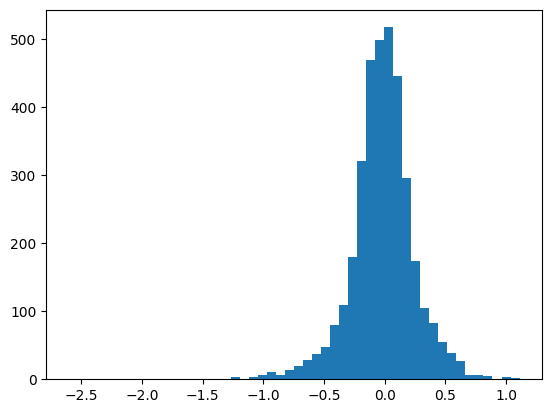

In [28]:
plt.hist(mlp.dense_layer_1.kernel.numpy().flatten(), bins=50);